# Predictive Analytics: Penyakit *Stroke*


---

Oleh: [Sinta Siti Nuriah](https://www.linkedin.com/in/sintasitinuriah/)

![stroke](https://ners.unair.ac.id/site/images/Lihat/20_stroke.png)

## Latar Belakang Masalah
---
Menurut Organisasi Kesehatan Dunia (WHO), *stroke* merupakan penyebab kematian terbanyak ke-2 di dunia, yang bertanggung jawab atas sekitar 11% dari total kematian.

Di Indonesia, *stroke* menjadi penyebab utama kecacatan dan kematian, yakni sebesar 11,2% dari total kecacatan dan 18,5% dari total kematian. Menurut data Survei Kesehatan Indonesia tahun 2023, prevalensi stroke di Indonesia mencapai 8,3 per 1.000 penduduk. Stroke juga merupakan salah satu penyakit katastropik dengan pembiayaan tertinggi ketiga setelah penyakit jantung dan kanker, yaitu mencapai Rp5,2 triliun pada 2023.


Upaya Kementerian Kesehatan (Kemenkes) dalam meminimalisir penyakit *stroke* dengan meningkatkan deteksi dini dislipidemia pada pasien diabetes melitus dan hipertensi sebagai upaya pencegahan *stroke*, dengan target pada 2024 sebesar 90% atau sekitar 10,5 juta penduduk. Namun, saat ini capaian deteksi dini stroke baru mencapai sekitar 11,3% dari target.

## Deskripsi Proyek
---
Proyek ini bertujuan untuk memaksimalkan upaya pemerintah dalam meminimalisir penyakit *stroke* dengan capaian deteksi sejak dini. Maka model *machine learning* terkiat *predictive analysis* penyakit *stroke* diharapkan dapat membantu dalam memprediksi penyakit *stroke* sejak dini.

Dataset yang digunakan dalam proyek ini berterkaitan dengan seorang pasien yang kemungkinan terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

# 1. Business Understanding
## Problem Statments
1. Tingginya angka kematian dan kecacatan akibat *stroke* di Indonesia, menjadikannya salah satu beban kesehatan utama secara nasional.
2. Capaian deteksi dini terhadap faktor risiko *stroke* seperti dislipidemia pada penderita diabetes melitus dan hipertensi masih sangat rendah (11,3%) dibandingkan target Kemenkes tahun 2024 (90%).
3. Kurangnya sistem prediksi atau skrining berbasis data untuk mengidentifikasi individu dengan risiko *stroke* tinggi secara lebih cepat dan efisien.

## Goals
1. Membangun prediksi yang mampu mengidentifikasi potensi *stroke* pada individu berdasarkan data klinis seperti hipertensi, kadar glukosa, kolesterol, usia, dan faktor risiko lainnya.
2. Meningkatkan efektivitas deteksi dini *stroke* secara otomatis menggunakan pendekatan *machine learning*, sehingga dapat membantu pemerintah atau lembaga kesehatan mempercepat capaian target 90%.
3. Menyediakan solusi berbasis data yang terukur dan dapat diintegrasikan ke dalam sistem pelayanan kesehatan.


## Solution Statement
Solusi 1: Membangun model klasifikasi baseline untuk prediksi stroke menggunakan algoritma seperti:
* Logistic Regression
* Decision Tree Classifier  

 Model ini akan digunakan sebagai baseline dengan metrik evaluasi seperti: Akurasi, Precision, Recall, dan F1-Score, khususnya pada kelas positif (stroke).

Solusi 2: Melakukan improvement dengan algoritma yang lebih kompleks, yaitu:
* XGBoost

  Model ini akan di-tuning menggunakan  Random Search untuk mengoptimalkan performa. Metrik evaluasi utama tetap fokus pada Recall, karena kesalahan negatif (false negative) dalam deteksi stroke harus diminimalisir.

Solusi 3:
Melakukan feature engineering seperti:
* Normalisasi data numerik (age, avg_glucose_level, BMI, dll.)
* Encoding variabel kategorik (gender, work_type, dll.)
* Handling imbalance data

# 2. Data Understanding

#### Data Understanding merupakan proses memahami impormasi dalam data dan menentukan kualitas dari tersebut.

## 2.1 Data Loading
#### Data loading merupakan tahapan untuk memuat dataset yang digunakan adat mudah dipahami. Informasi dataset telah dibersihkan dan dinormalisasi terlebih dahulu oleh pembuat, sehingga mudah digunakan dan dimanfaat oleh khalayak banyak.

---
### **Informasi Datasets**

|Jenis          |Keterangan                                         |
|---------------|---------------------------------------------------|
|Title          |Stroke Prediction Dataset                          |
|Source         |[Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)|
|License        |Data files © Original Authors                      |
|Visibility     |Public                                             |
|Tags           |Health, Health Conditions, Healthcare, Public Health, Binary Classification |
|Usability      |10.00                                              |

---
#### Attribute Information
|Attribute        |Describe                                                   |
|-----------------|-----------------------------------------------------------|
|id               |Unique identifier                                          |
|gender           |"Male", "Female", or "Order"                               |
|age              |age of the patient                                         |
|hypertenstion    |0 if the patient doesn't have hypertension, 1 if the patient has hypertension|
|heart_disease    | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease|
|ever_married     |"No" or "Yes"                                              |
|work_type        |"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"   |
|Residence_type   |"Rural" or "Urban"                                         |
|avg_glucose_level|average glucose level in blood                             |
|bmi              |body mass index                                            |
|smoking_status   |"formerly smoked", "never smoked", "smokes" or "Unknown"   |
|stroke           |1 if the patient had a stroke or 0 if not                  |

### Import Library yang dibutuhkan

In [1]:
!pip install -q kaggle

In [104]:
# Import load data library

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading data

In [31]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/MLT/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [32]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [53]:
df_stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [54]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Output Kode diatas memberikan informasi sebagai berikut:
*   Ada 5.110 baris (record atau jumlah pengamatan dalam dataset)
*   Terdapat 12 kolom id, age, hypertension, heart_disease, avg_glucose_level, bmi, stroke, gender, ever_married, work_type, Residence_type dan smoking_status



## 2.2 Exploratory Data Analysis (EDA)

##### Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 2.2.1 EDA - Deskripsi Variabel

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), variabel-variabel pada Diamond dataset adalah sebagai berikut:
1. id: Identitas unik untuk setiap pasien.
2. gender: Jenis kelamin pasien, dengan kemungkinan nilai: "Male" (laki-laki), "Female" (perempuan), atau "Other" (lainnya).
3. age: Usia pasien (dalam tahun).
4. hypertension: Status hipertensi pasien, dengan nilai:
    * 0: Tidak memiliki hipertensi
    * 1: Memiliki hipertensi
5. heart_disease: Status penyakit jantung pasien, dengan nilai:
    * 0: Tidak memiliki penyakit jantung
    * 1: Memiliki penyakit jantung
6. ever_married: Status pernikahan pasien, dengan nilai "Yes" (sudah menikah) atau "No" (belum menikah).
7. work_type: Jenis pekerjaan pasien, terdiri dari:
    * "children": Anak-anak (belum bekerja)
    * "Govt_job": Pegawai pemerintah
    * "Never_worked": Belum pernah bekerja
    * "Private": Pegawai swasta
    * "Self-employed": Wirausaha
8. Residence_type: Jenis tempat tinggal pasien, yaitu "Rural" (pedesaan) atau "Urban" (perkotaan).
9. avg_glucose_level: Rata-rata kadar glukosa dalam darah (dalam satuan mg/dL).
10. bmi: Indeks Massa Tubuh pasien (Body Mass Index).
11. smoking_status: Status merokok pasien, terdiri dari:
    * "formerly smoked": Pernah merokok
    * "never smoked": Tidak pernah merokok
    * "smokes": Masih merokok
    * "Unknown": Informasi tidak tersedia
12. stroke: Label target, dengan nilai:
    * 1: Pasien pernah mengalami stroke
    * 0: Pasien tidak pernah mengalami stroke

In [55]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dari info di atas terdapat 12 kolom sesuai dengan atribut yang dijelaskan pada informasi atribut pada bagian loading data dan pada deskripsi variabel. keterangan sebagai berikut:
* Terdapat 7 kolom numerik dengan tipe data **float64** dan **int64**, kolom yang dimaksud adalah id, age, hypertension, heart_disease, avg_glucose_level, bmi dan stroke.
* Terdapat 5 kolom object dengan tipe data **object** yaitu gender, ever_married, work_type, Residence_type dan smoking_status

In [56]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* Max adalah nilai maksimum.
---
Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 25% adalah kuartil pertama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.

In [57]:
df_stroke.shape

(5110, 12)


|Jumlah Baris |Jumlah Kolom|
|-------------|------------|
|5110         |12          |


### 2.2.2 EDA - Menangani Missing Value

In [58]:
df_stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [59]:
df_stroke['bmi'].fillna(df_stroke['bmi'].median(), inplace=True)

<ipython-input-59-da3d6067575b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stroke['bmi'].fillna(df_stroke['bmi'].median(), inplace=True)


In [60]:
df_stroke.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


###  2.2.3 EDA - Menangani Outliers

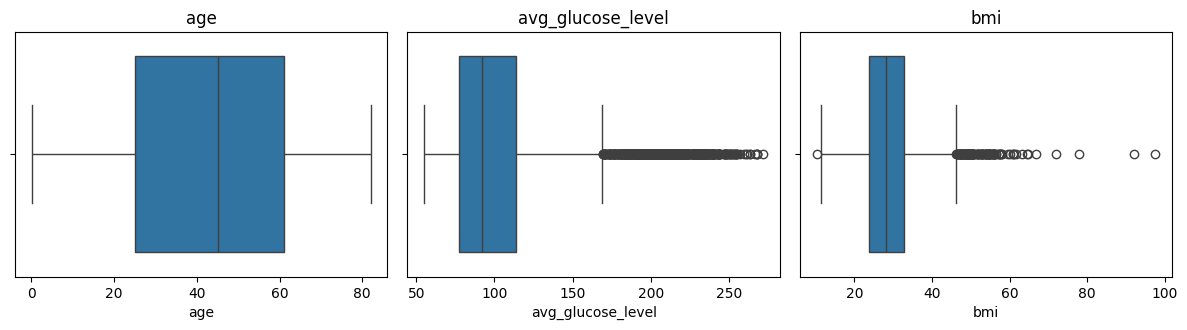

In [61]:
# Menampilkan visualisasi boxplot fitur numerikal
numerical_cols = df_stroke.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_stroke[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [62]:
# Hitung Q1, Q3 dan IQR hanya untuk kolom numerikal
Q1 = df_stroke[numerical_cols].quantile(0.25)
Q3 = df_stroke[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier
filter = ~((df_stroke[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_stroke[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_stroke = df_stroke[filter]

df_stroke.shape

(4391, 12)

Dataset sekarang telah bersih dan memiliki 4.260 sampel

### 2.2.4 EDA - Unvariate Analysis

In [63]:
# menghapus kolom id
df_stroke = df_stroke.drop(columns=['id'])

In [64]:
numerical_features = df_stroke.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_stroke.select_dtypes(include=['object']).columns

        Jumlah sampel  persentase
gender                           
Female           2590   58.984286
Male             1800   40.992940
Other               1    0.022774


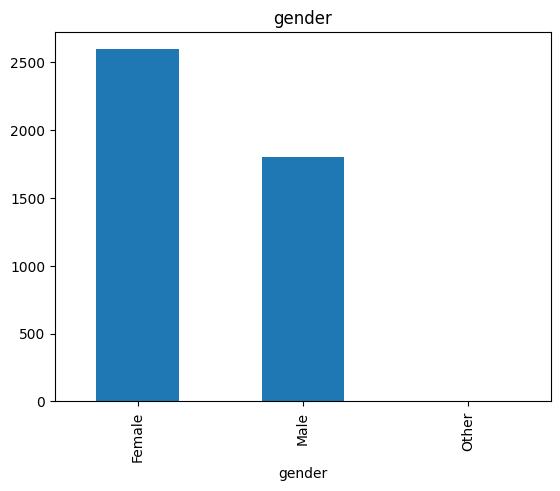

              Jumlah sampel  persentase
ever_married                           
Yes                    2735   62.286495
No                     1656   37.713505


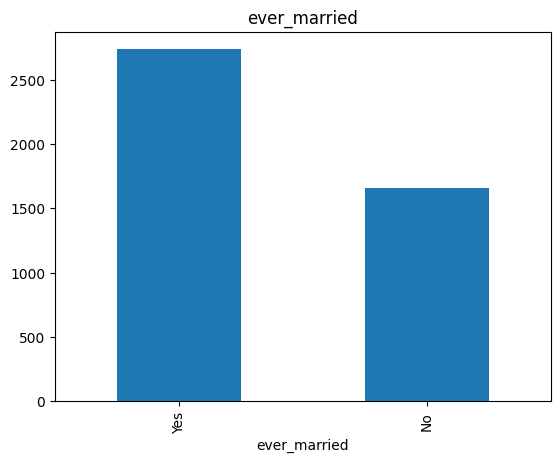

               Jumlah sampel  persentase
work_type                               
Private                 2482   56.524710
children                 674   15.349579
Self-employed            661   15.053519
Govt_job                 552   12.571168
Never_worked              22    0.501025


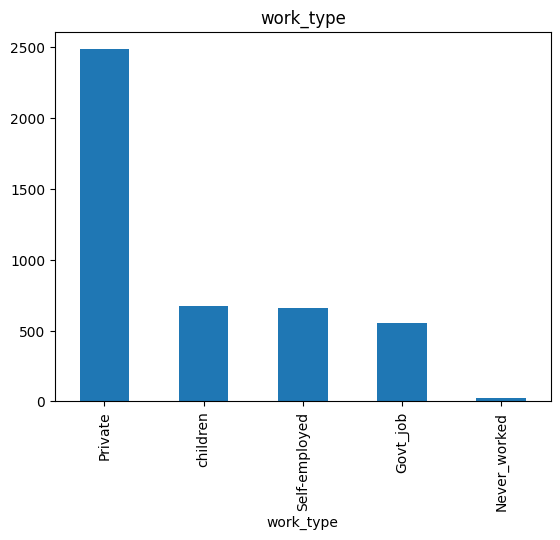

                Jumlah sampel  persentase
Residence_type                           
Urban                    2230   50.785698
Rural                    2161   49.214302


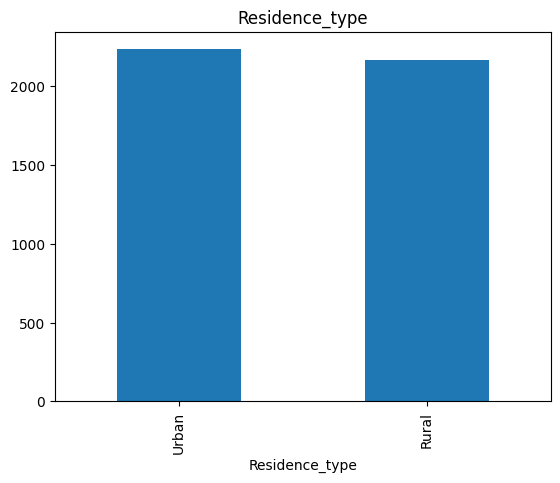

                 Jumlah sampel  persentase
smoking_status                            
never smoked              1595   36.324300
Unknown                   1418   32.293327
formerly smoked            708   16.123890
smokes                     670   15.258483


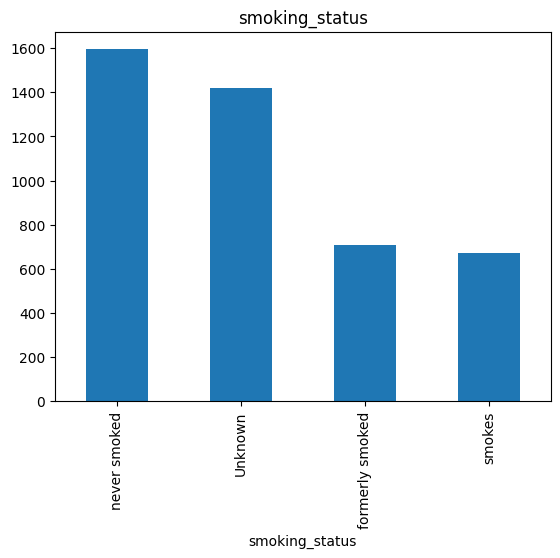

In [65]:
for feature in categorical_features:
  count = df_stroke[feature].value_counts()
  percent = 100*df_stroke[feature].value_counts(normalize=True)
  df_count = pd.DataFrame({'Jumlah sampel':count, 'persentase':percent})
  print(df_count)
  df_count.index.name = feature
  count.plot(kind='bar', title=feature)
  plt.show()

Berdasarkan informasi dari bar chart diatas terdapat persentase sebagai berikut:
* Gender perempuan sebanyak 59% dan laki-laki 40% dan sisanya lainnya.
* Status pernikahan sebanyak 62% sudah menikah sisanya belum menikah
* work_type sebanyak 56% private, 15% children, 14% self-employed 12% Govt_job dan sisanya tidakbekerja
* residence_type sebanyak 50% urban sisanya rural.
* smoking_status sebanyak 35% never_smoked, 32% unkonwn, 15% Formerly smoked dan sisanya smokes.

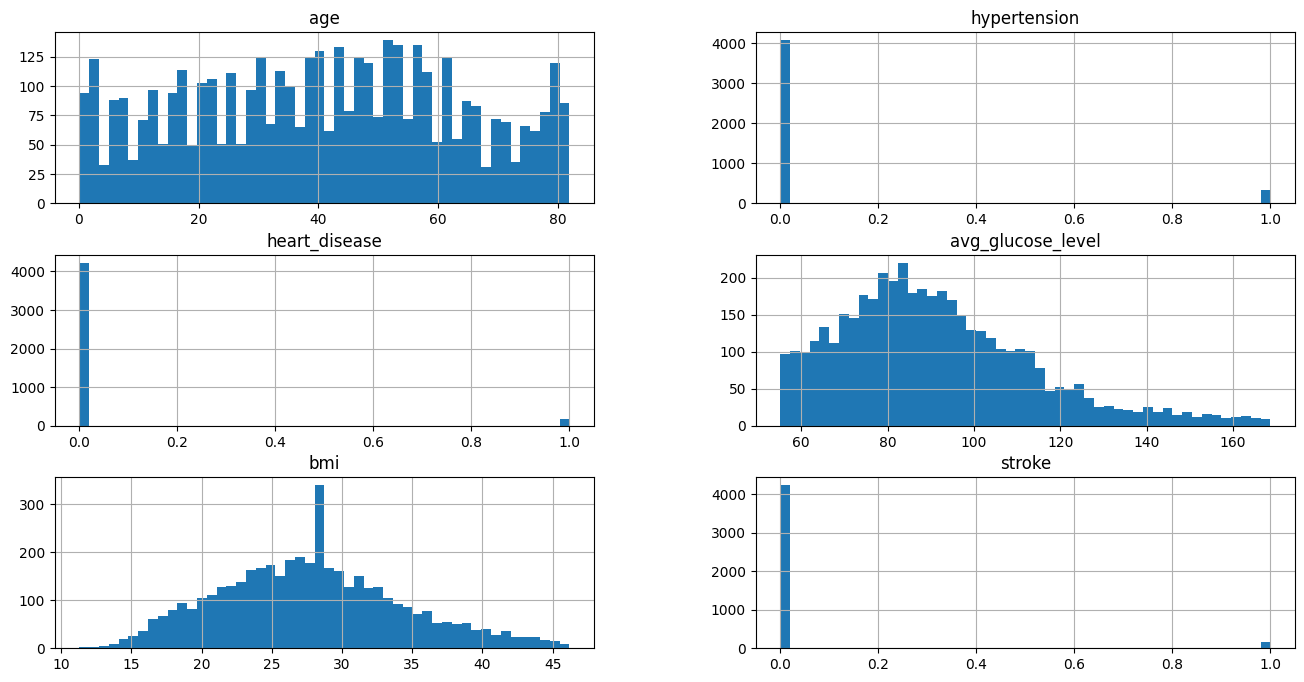

In [66]:
df_stroke[numerical_features].hist(bins=50, figsize=(16,8))
plt.show()

Gambar di atas menunjukkan tiga grafik batang (histogram) yang menggambarkan sebaran data pasien berdasarkan tiga variabel numerik, yaitu:
1. Age(usia):
   * Grafik pertama menunjukkan jumlah pasien berdasarkan kelompok usia.
   * Terlihat bahwa pasien tersebar hampir merata dari usia muda hingga lanjut usia.
   * Tidak ada usia tertentu yang dominan, artinya stroke dapat terjadi pada semua kelompok usia, meskipun jumlah pasien sedikit lebih banyak pada usia 40–60 tahun.
2. Avg Glucose Level (Rata-rata Kadar Gula Darah):
   * Grafik kedua menunjukkan jumlah pasien berdasarkan kadar gula darah rata-rata mereka.
   * Sebagian besar pasien memiliki kadar gula darah antara 80 hingga 100 mg/dL.
   * Semakin tinggi kadar gula darah, jumlah pasiennya semakin sedikit.
   * Ini mengindikasikan bahwa kadar gula yang sangat tinggi lebih jarang, namun tetap penting karena bisa jadi faktor risiko stroke.
3. BMI (Indeks Massa Tubuh):
   * Grafik ketiga menggambarkan jumlah pasien berdasarkan nilai BMI (pengukuran berat badan relatif terhadap tinggi).
   * Mayoritas pasien memiliki BMI antara 25 hingga 30, yang masuk kategori overweight (kelebihan berat badan).
   * Ini menunjukkan bahwa banyak pasien stroke berada dalam rentang berat badan yang tidak ideal, yang dapat menjadi faktor risiko juga

Jadi **Kesimpulan** dari grafik-grafik ini, adalah:
- Pasien stroke datang dari berbagai usia, tapi lebih banyak pada usia paruh baya hingga tua.
- Kadar gula darah dan berat badan yang tidak ideal tampaknya sering ditemukan pada pasien stroke.
- Menjaga kadar gula darah dan berat badan dalam batas normal bisa membantu mengurangi risiko terkena stroke.

### 2.2.5 EDA - Multivariate Analysis

Categorical Feature

<ipython-input-67-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


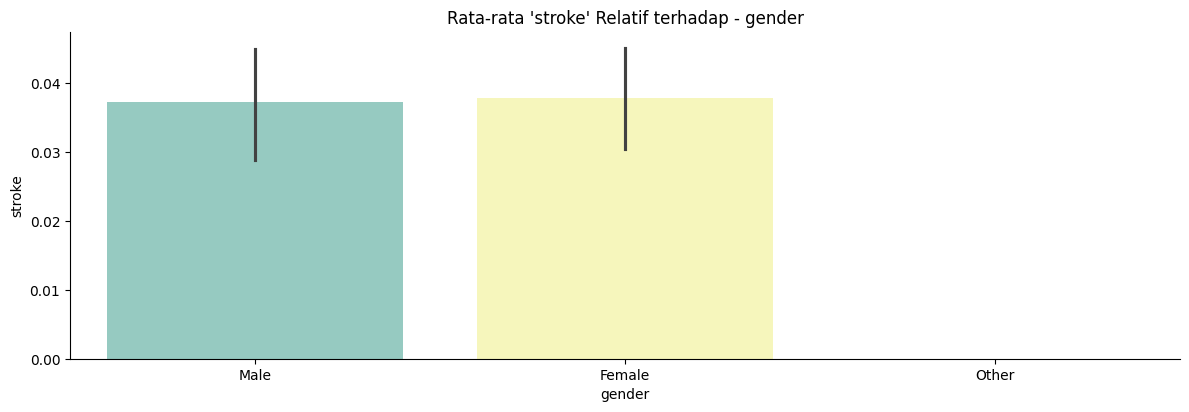

<ipython-input-67-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


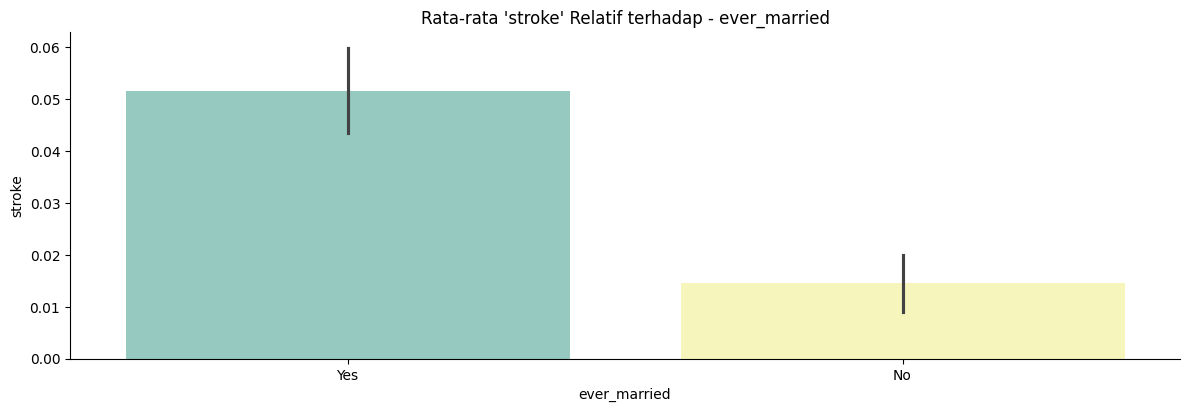

<ipython-input-67-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


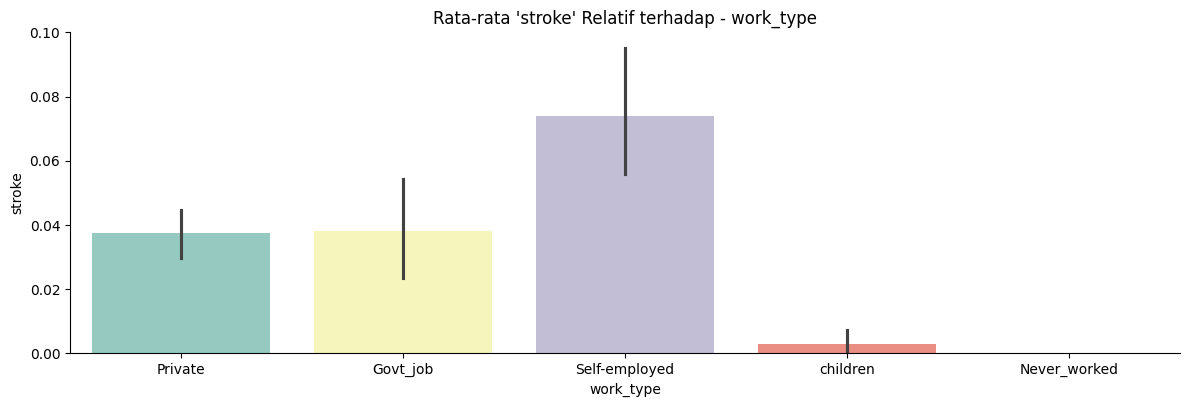

<ipython-input-67-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


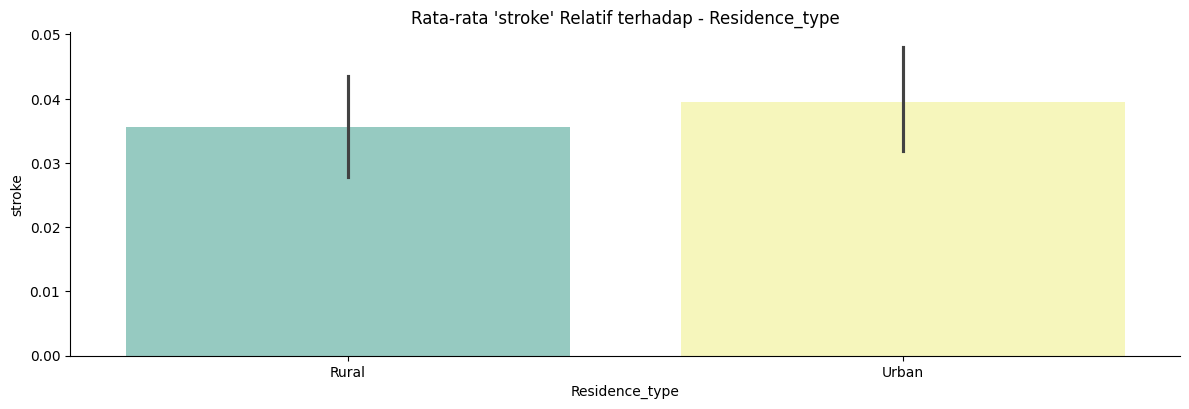

<ipython-input-67-a6b5b1667b4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")


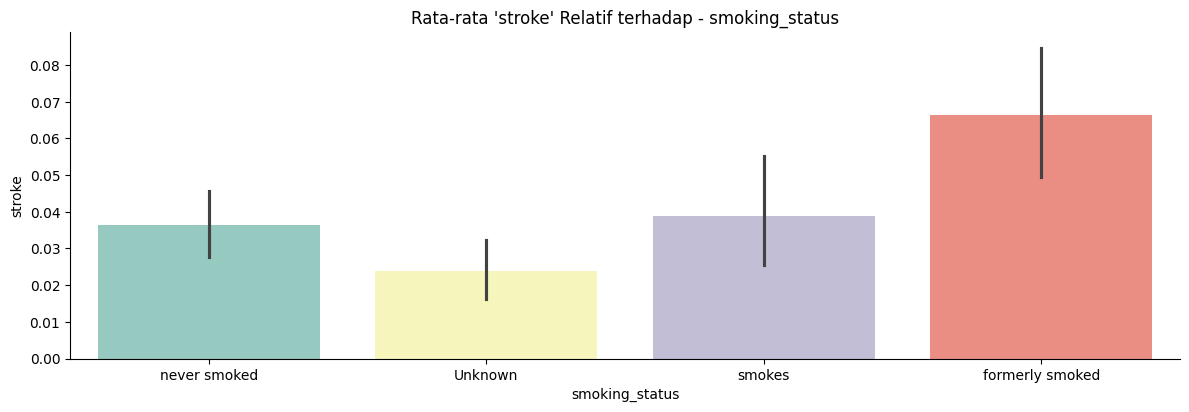

In [67]:
for feature in categorical_features:
  sns.catplot(x=feature, y='stroke', data=df_stroke, kind='bar', dodge=False, height=4, aspect=3, palette="Set3")
  plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(feature))
  plt.show()

Dengan mengamati rata-rata stroke relatif terhadap fitur kategori diatas, didapatkan *insight* sebagai berikut:
1. Rata-rata stroke terhadap gender cenderung mirip. Rentangnya berada antara 3-3,5%.
2. Rata-rata stroke terhadap ever_merried tertinggi adalah sudah menikah dengan persentase sebesar 4,3%.
3. Rata-rata stroke terhadap work_Type secara umum self_employed dengan persentase sebesar 6.1%
4. Rata-rata stroke terhadap residence_type cendering mirip. Rentangnya berada diantara 3-3,5%
5. Rata-rata stroke terhadap smoking_status secara umum status formerly_smoked lebih tinggi diantara yang lainnya yaitu sekitar 5%.

Numerical Feature

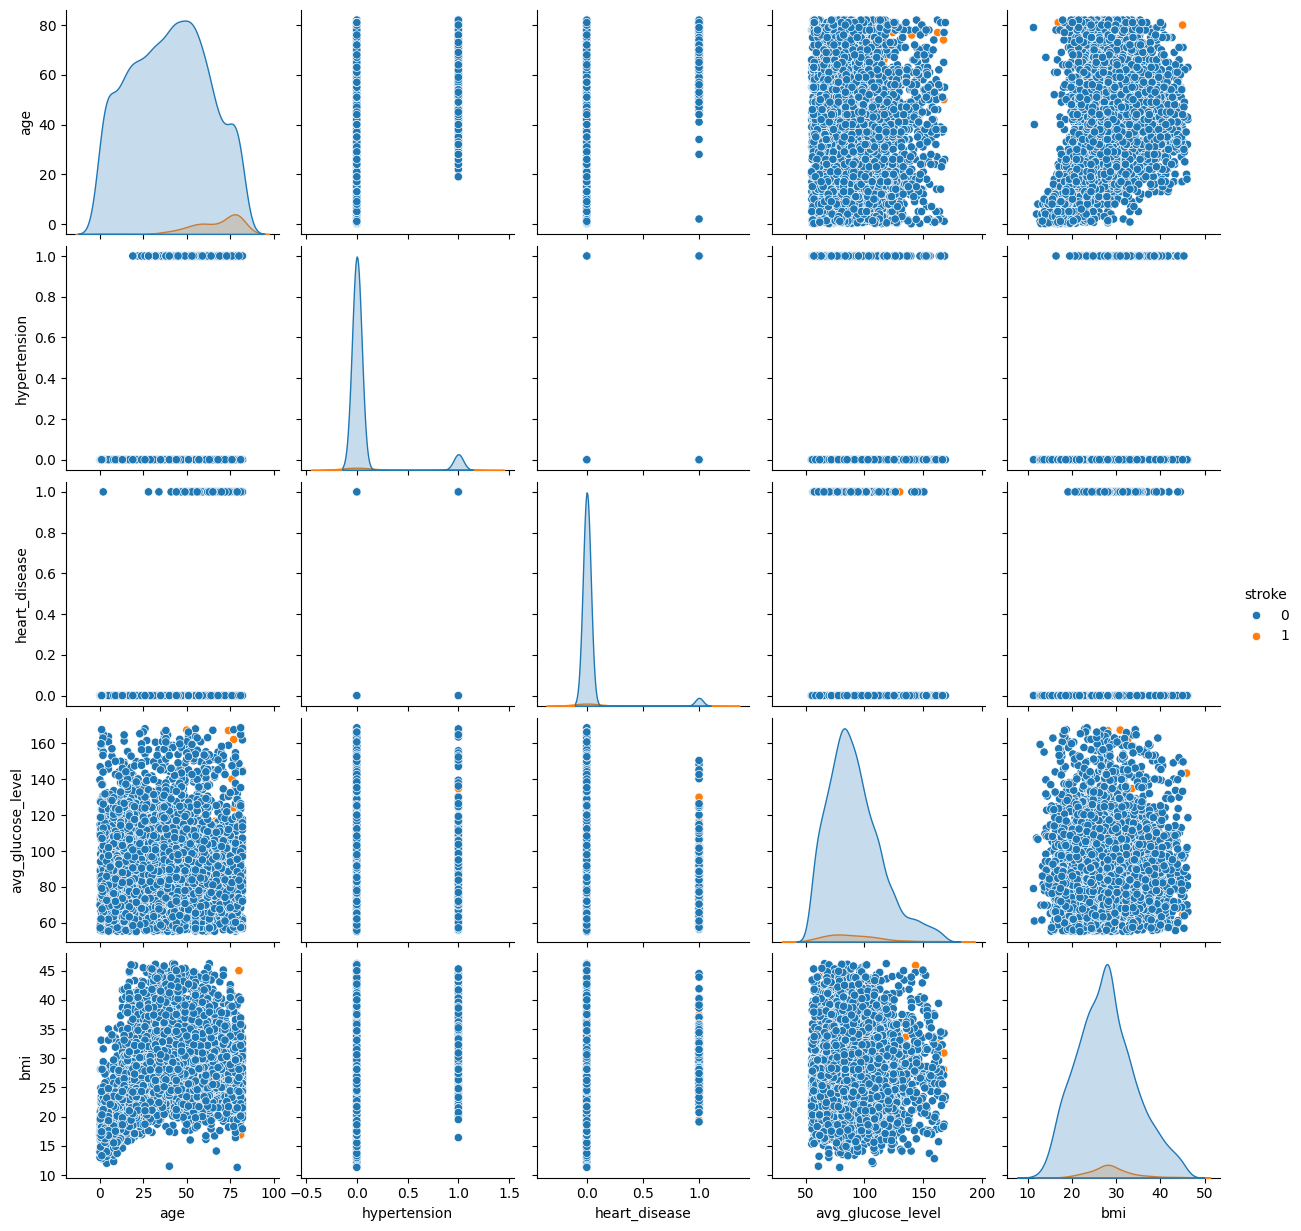

In [68]:
sns.pairplot(df_stroke[numerical_features], hue='stroke')
plt.show()

*Insight* dari gambar pairplot diatas adalah:
* Usia menjadi faktur penting dalam penyakit stroke ini: Stroke lebih banyak terkena pada orang yang lebih tua.
* Glukosa rata-rata tinggi dan hipertensi/jantung juga berkaitan dengan kejadian stroke

Matrix Korelasi

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_stroke[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrix Korelasi')
plt.show()

In [69]:
df_stroke[numerical_features].corr()['stroke'].sort_values(ascending=False)[1:]

,stroke
age,0.226975
hypertension,0.113056
heart_disease,0.089734
bmi,0.030728
avg_glucose_level,0.002856


# 3. Data Preparation

Upsample Data

## 3.1 Encoding Fitur Kategori

In [26]:
for feature in categorical_features:
  print(feature)
  print(df_stroke[feature].unique())

gender
['Male' 'Female' 'Other']
ever_married
['Yes' 'No']
work_type
['Private' 'Govt_job' 'Self-employed' 'children' 'Never_worked']
Residence_type
['Rural' 'Urban']
smoking_status
['never smoked' 'Unknown' 'smokes' 'formerly smoked']


In [28]:
df_stroke.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
4,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
2967,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
2968,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
2969,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
2970,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [29]:
df_encoded = df_stroke.copy()

In [70]:
label_encoder = OneHotEncoder()
df_encoded['gender'] = df_encoded['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df_encoded['Residence_type'] = label_encoder.fit_transform(df_encoded[['Residence_type']]).toarray()
df_encoded['ever_married'] = label_encoder.fit_transform(df_encoded[['ever_married']]).toarray()
df_encoded['work_type'] = df_encoded['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df_encoded['smoking_status'] = df_encoded['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'unknown':-1}).astype(np.uint8)
df_encoded

<ipython-input-70-2f1c906822af>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['smoking_status'] = df_encoded['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2,'unknown':-1}).astype(np.uint8)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0,80.0,0,1,1.0,0,0.0,105.92,32.5,0,1
6,0,74.0,1,1,1.0,0,0.0,70.09,27.4,0,1
7,1,69.0,0,0,0.0,0,1.0,94.39,22.8,0,1
10,1,81.0,1,0,1.0,0,0.0,80.43,29.7,0,1
11,1,61.0,0,1,1.0,2,0.0,120.46,36.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1.0,0,0.0,77.93,21.7,0,0
5105,1,80.0,1,0,1.0,0,1.0,83.75,28.1,0,0
5106,1,81.0,0,0,1.0,1,1.0,125.20,40.0,0,0
5107,1,35.0,0,0,1.0,1,0.0,82.99,30.6,0,0


Proses encoding ini digunakan untuk mengubah data non-numerik menjadi bentuk numerik dengan tujuan:
1. Membuat data dapat diproses oleh algoritma machine learning yang akan digunakan
2. Mempertahankan makna kategorikal dalam bentuk numerik agar informasi tidak hilang ketika dilakukannya perubahan.

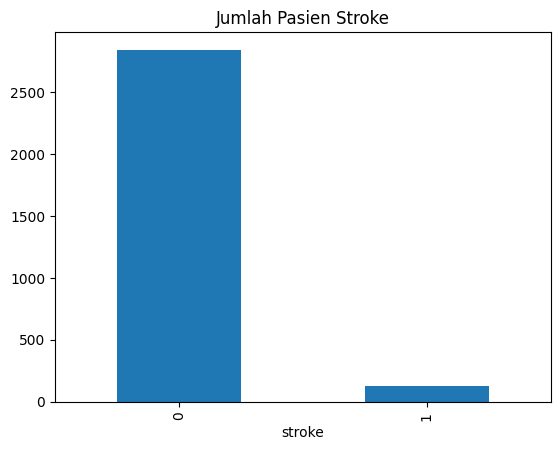

In [71]:
# Visualisasi stroke
df_encoded['stroke'].value_counts().plot(kind='bar', title='Jumlah Pasien Stroke')
plt.show()


## 3.2 Pembagian Data

In [72]:
X = df_encoded[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi', 'smoking_status']]
y = df_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
X_test.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
884,1,62.0,0,0,0,60.20,27.7,2
1389,0,12.0,0,0,255,86.00,20.1,2
2853,0,30.0,0,0,0,141.80,31.9,0
1318,0,50.0,0,1,0,85.82,31.9,0
2198,0,45.0,1,0,1,90.43,39.7,1


Proses ini digunakan untuk melatih model (training) dan mengukur performa model dengan testing. Untuk kasus ini dilakukan pembagian dengan skala 80% training dan 20 testing

## 3.3 SMOTE

Proses SMOTE ini digunakan untuk mengatasi data yang tidak seimbang, untuk kasus yang sedang diselesaikan dibutuhkan proses ini dikarenakan data untuk orang yang kena stroke dan yang tidak kena, perbandingannya sangat jauh maka diperlukannlah teknik untuk mengatasi ketidakseimbangan tersebut seperti SMOTE.

In [74]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.ravel())

df_resampled = pd.concat([pd.DataFrame(X_train_resampled), pd.DataFrame(y_train_resampled)], axis=1)

<ipython-input-74-1ec5fa6bc761>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.ravel())


In [75]:
df_resampled

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,0
0,1,42.000000,0,0,2,59.430000,25.400000,0,0
1,1,25.000000,0,0,0,78.590000,37.200000,0,0
2,0,79.000000,1,0,0,75.020000,28.100000,0,1
3,1,56.000000,0,0,0,77.490000,36.000000,2,0
4,0,43.000000,0,0,2,84.430000,30.000000,1,0
...,...,...,...,...,...,...,...,...,...
4539,1,43.748459,0,0,0,94.562705,30.074846,1,1
4540,0,77.915788,0,0,1,92.866417,28.428426,1,1
4541,1,72.518559,0,0,1,89.443021,33.408453,1,1
4542,0,79.386055,0,0,0,75.860823,22.721853,0,1


### 3.3.1 Distribusi Data Training Setelah SMOTE

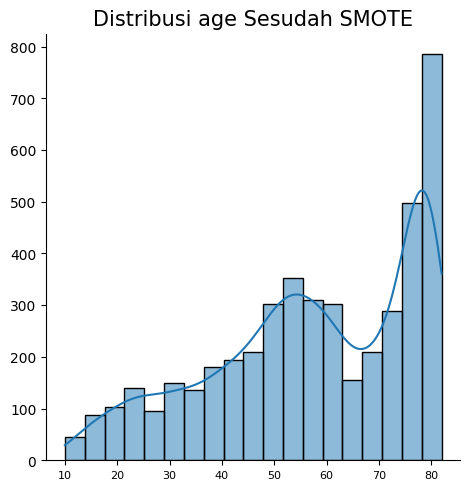

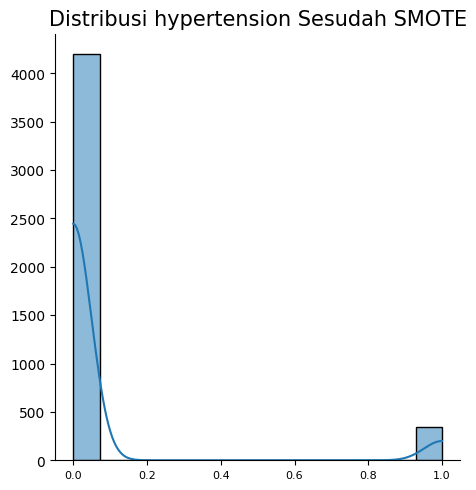

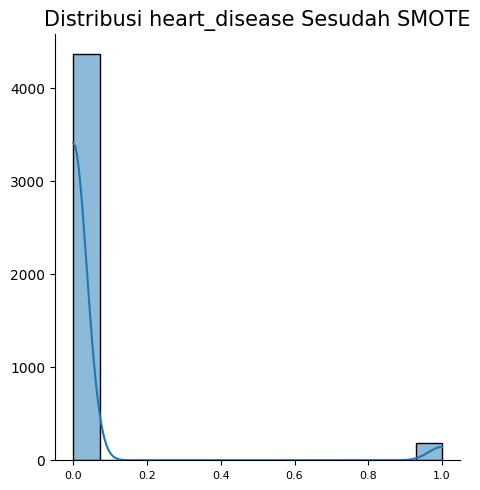

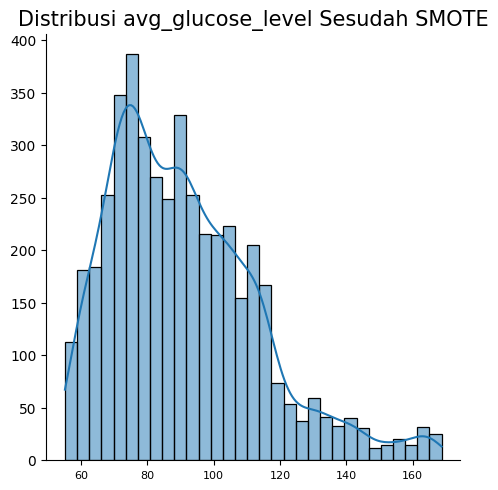

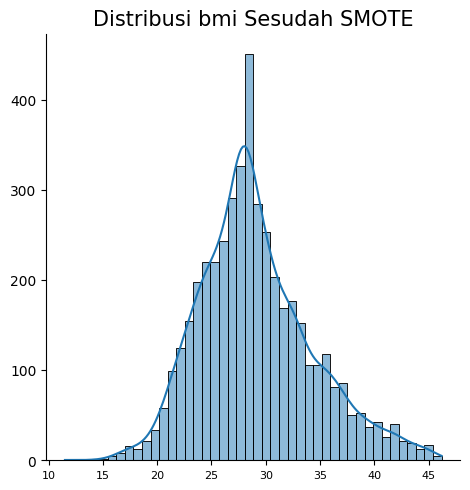

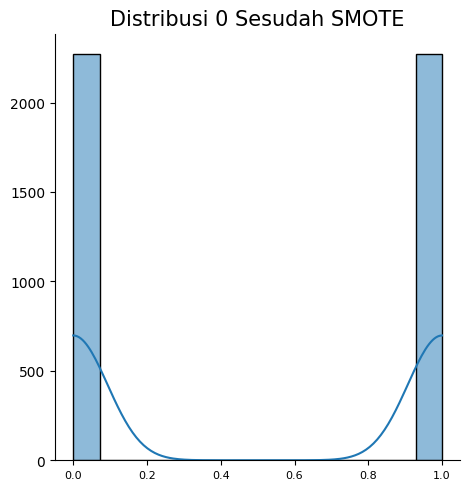

In [77]:
numerical_cols = [col for col in df_resampled.columns if col not in categorical_features]

for i in numerical_cols:
  ax = sns.displot(df_resampled[i], kde=True)
  plt.title(f'Distribusi {i} Sesudah SMOTE', fontsize = 15)
  plt.xlabel('')
  plt.ylabel('')
  plt.xticks(fontsize=8)
  plt.show()

### 3.3.2 Korelasi matriks setelah smote

Text(0.5, 1.0, 'Correlation Matrix')

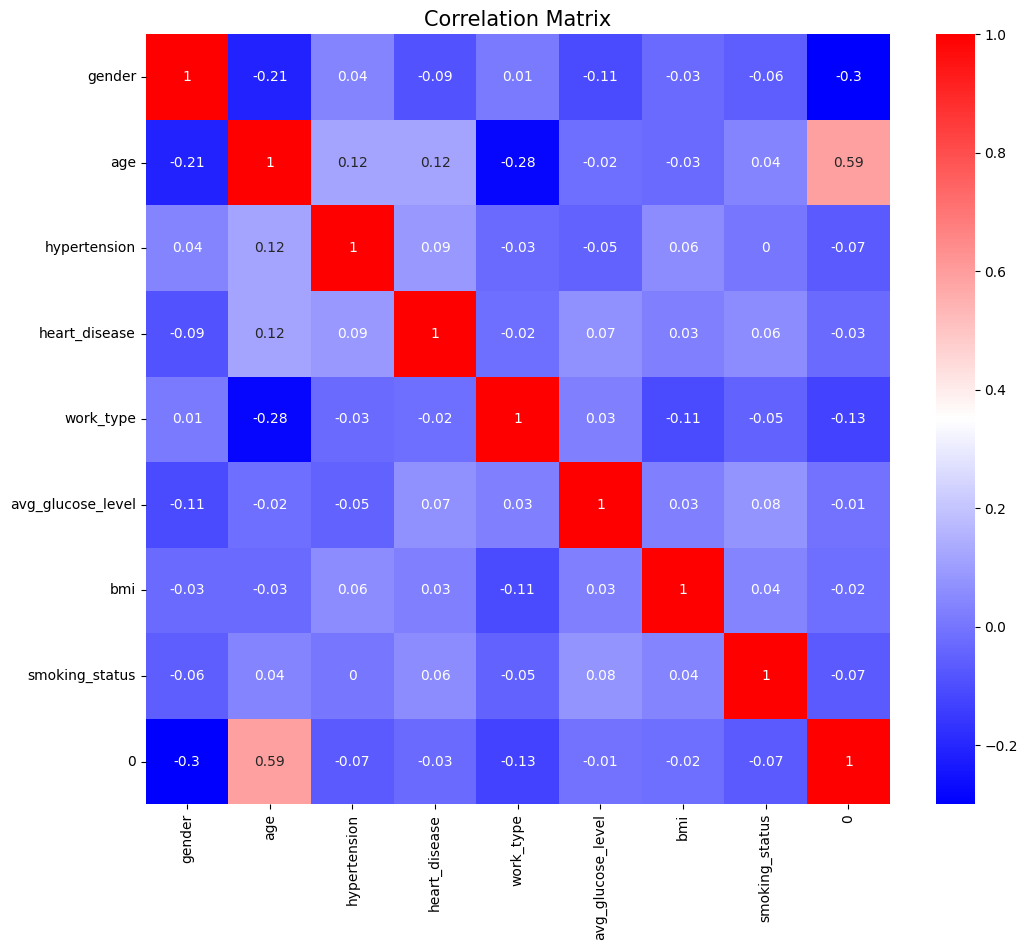

In [78]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_resampled.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.title('Correlation Matrix', size=15)

## 3.4 Standarisasi

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Proses ini dibutuhkan ketika melakukan pemodelan dengan Logistic Regression

# 4. Modeling

Tahapan ini membahas mengenai model machine learning yang digunakan untuk menyelesaikan permasalahan.

## 4.1 Membangun model klasifikasi baseline untuk prediksi stroke

### 4.1.1 Algoritma Logistic Regression

Regresi logistik (kadang disebut model logistik atau model logit), dalam statistika digunakan untuk prediksi probabilitas kejadian suatu peristiwa dengan mencocokkan data pada fungsi logit kurva logistik

In [81]:
model_lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_lr.fit(X_train_scaled, y_train_resampled)

y_pred_lr = model_lr.predict(X_test_scaled)

In [82]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi: {accuracy:.4f}")

Akurasi: 0.7395


### 4.1.2 Algoritma Random Forest Classifier

In [106]:
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train_resampled)

y_pred_rf = model_rf.predict(X_test_scaled)

In [107]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy_rf:.4f}")

Akurasi: 0.8941


### 4.1.3.Plot perbandingan accuracy untuk kedua Model

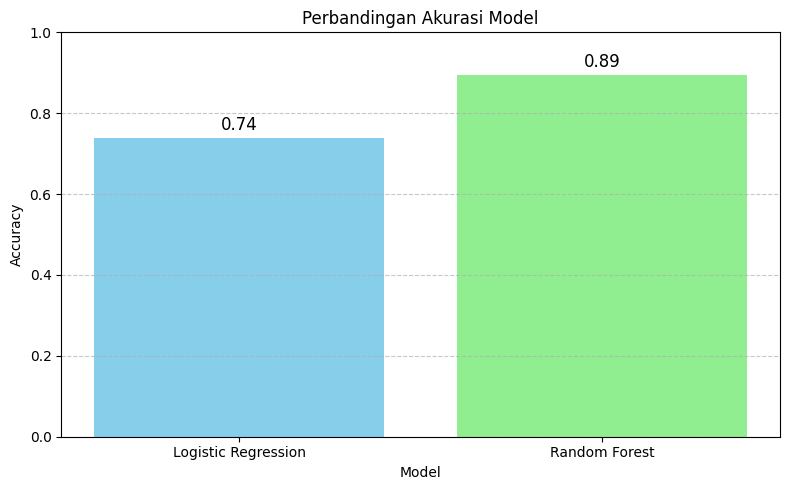

In [108]:
# Plot perbandingan acc model
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)  # karena akurasi dalam skala 0–1
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Pada plot ini dapat dilihat bahwa nilai accuracy Logistic Regression lebih tinggi dibandingkan dengan Decision Tree, dengan hal ini model Logistic Regression akan dilakukan improvement dengan hyperparameter tuning kemudian dibandingkan kembali dengan XGBoost

## 4.2 Melakukan improvement dengan algoritma yang lebih kompleks

### 4.2.1 Algoritma XGBoost

In [117]:
scale = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
model_xgb = XGBClassifier(random_state=42, scale_pos_weight=scale)
model_xgb.fit(X_train_scaled, y_train_resampled)

y_pred_xgb = model_xgb.predict(X_test_scaled)

In [118]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Akurasi: {accuracy_xgb:.2f}')

Akurasi: 0.85


### 4.2.2 Hyperparameter Tunning XGBosst dan Logistic Regression dengan Random Search

#### Logistic Regression dengan Random Search

In [119]:
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

random_search = RandomizedSearchCV(
    model_lr,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train_resampled)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
best_acc_lr = random_search.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': np.float64(0.00026366508987303583)}
Best Accuracy: 0.7940155178001288


#### XGBoost dengan Random Search

In [120]:
# Parameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 0.5, 1]
}

random_search_xgb = RandomizedSearchCV(
    model_xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_scaled, y_train_resampled)

print("Best Parameters:", random_search_xgb.best_params_)
print("Best Accuracy:", random_search_xgb.best_score_)
best_acc_xgb = random_search_xgb.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best Accuracy: 0.9194558161232239


### 4.1.3.Plot perbandingan accuracy untuk kedua Model

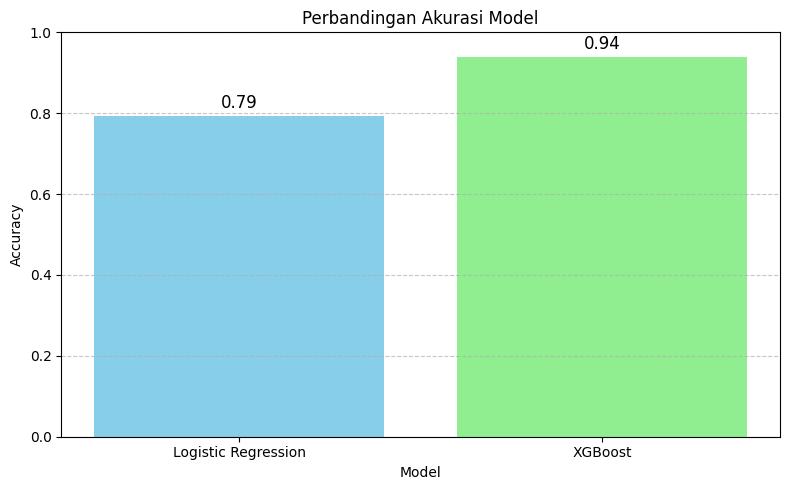

In [95]:
# Plot perbandingan acc model
models = ['Logistic Regression', 'XGBoost']
accuracies = [best_acc_lr, best_acc_xgb]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)  # karena akurasi dalam skala 0–1
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas menunjukan bahwa nilai acc setelah dilakukan hyperparameter tuning pada model Logistic Regression dan XGBoost kedua berada pada nilai 90%. Namun, XGboost lebih besar dengan nilai acc 97%

# 5. Evaluasi

## 5.1 Evaluasi model baseline

In [96]:
print("Logistic Regression Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
[[428 141]
 [ 14  12]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       569
           1       0.08      0.46      0.13        26

    accuracy                           0.74       595
   macro avg       0.52      0.61      0.49       595
weighted avg       0.93      0.74      0.82       595



In [109]:
print("Decision Tree Evaluation:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Decision Tree Evaluation:
[[524  45]
 [ 18   8]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       569
           1       0.15      0.31      0.20        26

    accuracy                           0.89       595
   macro avg       0.56      0.61      0.57       595
weighted avg       0.93      0.89      0.91       595



In [110]:
# Classification report untuk LR
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
# Classification report untuk RF
report_dt = classification_report(y_test, y_pred_rf, output_dict=True)

In [111]:
# Ambil metrik untuk kelas 0 dan 1
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

data = []

for cls in classes:
    for metric in metrics:
        data.append({
            'Model': 'Logistic Regression',
            'Class': cls,
            'Metric': metric,
            'Score': report_lr[cls][metric]
        })
        data.append({
            'Model': 'Decision Tree',
            'Class': cls,
            'Metric': metric,
            'Score': report_dt[cls][metric]
        })

df_plot = pd.DataFrame(data)

<ipython-input-112-d6f79079d1d3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)


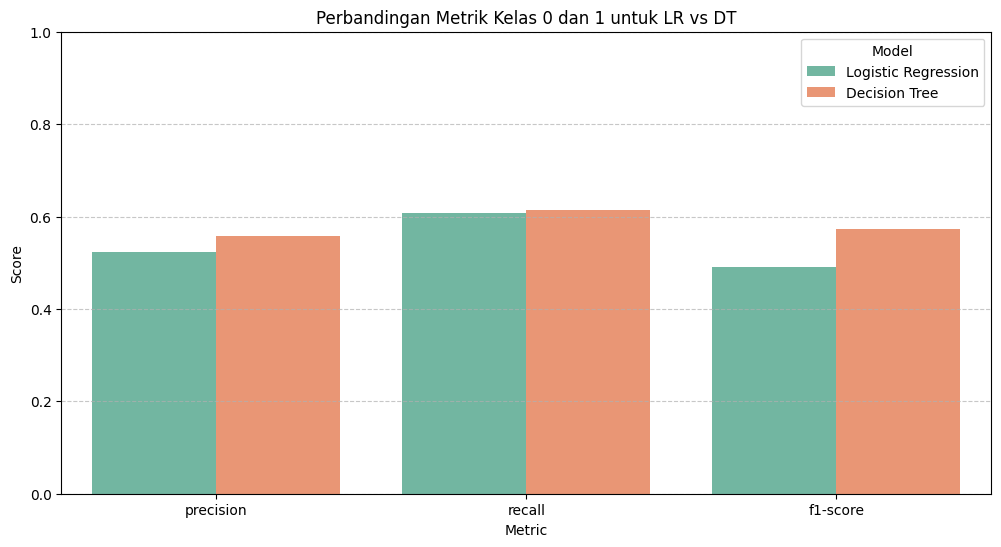

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', ci=None, palette='Set2', dodge=True)
plt.title('Perbandingan Metrik Kelas 0 dan 1 untuk LR vs DT')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.2 Evaluasi Model Algoritma Kompleks XGBoost

In [123]:
print("XGBoost Evaluation:")
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
threshold = 0.9  # kamu bisa eksperimen nilainya
y_pred_threshold = (y_proba_xgb >= threshold).astype(int)

print("XGBoost Evaluation with Custom Threshold:")
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))

XGBoost Evaluation:
XGBoost Evaluation with Custom Threshold:
[[569   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       569
           1       0.00      0.00      0.00        26

    accuracy                           0.96       595
   macro avg       0.48      0.50      0.49       595
weighted avg       0.91      0.96      0.93       595



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5.3 Evaluasi XGBoost dengan Hyperparameter Tuning

In [124]:
# Classification Report
best_xgb_model = random_search_xgb.best_estimator_
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.9  # kamu bisa eksperimen nilainya
y_pred_threshold = (y_proba_xgb >= threshold).astype(int)

print("XGBoost Evaluation with Custom Threshold:")
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))

XGBoost Evaluation with Custom Threshold:
[[569   0]
 [ 26   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       569
           1       0.00      0.00      0.00        26

    accuracy                           0.96       595
   macro avg       0.48      0.50      0.49       595
weighted avg       0.91      0.96      0.93       595



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Kesimpulan
Meskipun telah dilakukan berbagai pendekatan seperti penanganan data imbalance (SMOTE), pemilihan algoritma yang lebih kompleks (seperti XGBoost), serta optimasi hyperparameter menggunakan Random Search, model masih menunjukkan performa yang kurang memuaskan — terutama dalam hal recall dan f1-score pada kelas minoritas (stroke).